<h1><center>Assignment 2 : Clustering and Classification with Python</center></h1> 

## Part 2 : Clustering Data


In [3]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

ModuleNotFoundError: No module named 'pandas'

## Modeling for Clustering

We preferred KMeans because it's relatively simple to implement, scales well to large data sets, works well with low dimensioned datasets, and guarantees convergence.

‘K-means++’, selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

In [4]:
OD = pd.read_csv('./Data/OD.csv', sep=';')
ND = pd.read_csv('./Data/ND.csv', sep=';')

##cluster size set to class size (2)
kmeans = KMeans(2, init="k-means++")

##COD
clustersOD = kmeans.fit_predict(OD.drop("class", axis=1))
COD = OD.copy()
COD["clusters"] = clustersOD


##CND
clustersND = kmeans.fit_predict(ND.drop("class", axis=1))
CND = ND.copy()
CND["clusters"] = clustersND



NameError: name 'pd' is not defined

## Clustering results


In this chapter we compare the clustering results between normalized and non-normalized dataset.


In [103]:
correlationsOD = COD.corr().abs().unstack().sort_values(ascending=False) # Build correlation matrix
correlationsOD = pd.DataFrame(correlationsOD).reset_index() # Convert to dataframe
correlationsOD.columns = ['col1', 'col2', 'correlationsOD'] # Label it
print(correlationsOD.query("col1 == 'clusters' & col2 != 'clusters'"),end="\n\n") # Filter by variable



correlationsND = CND.corr().abs().unstack().sort_values(ascending=False)
correlationsND = pd.DataFrame(correlationsND).reset_index() 
correlationsND.columns = ['col1', 'col2', 'correlationsND'] 
print(correlationsND.query("col1 == 'clusters' & col2 != 'clusters'")) # Filter by variable



         col1                col2  correlationsOD
18   clusters                 age        0.823794
46   clusters     visual_blurring        0.399489
94   clusters    muscle_stiffness        0.285625
96   clusters          polyphagia        0.284089
101  clusters            alopecia        0.282242
106  clusters     delayed_healing        0.269374
136  clusters     partial_paresis        0.235757
171  clusters             itching        0.190486
173  clusters            weakness        0.189393
195  clusters        irritability        0.149295
205  clusters            polyuria        0.142574
243  clusters             obesity        0.102722
252  clusters          polydipsia        0.095088
273  clusters               class        0.068123
297  clusters  sudden_weight_loss        0.040189
299  clusters                male        0.032790
316  clusters      genital_thrush        0.007531

         col1                col2  correlationsND
18   clusters          polydipsia        0.692204

## Commenting on correlation of the results

As can seen, in non-normalized dataset age feature influences the clustering result a lot, namely it has big correlation score with clustering.

In [104]:
print(correlationsOD.query("col1 == 'clusters' & col2 == 'age'"),end="\n\n")
print(correlationsND.query("col1 == 'clusters' & col2 == 'age'"))

        col1 col2  correlationsOD
18  clusters  age        0.823794

        col1 col2  correlationsND
69  clusters  age        0.353099


**Checking clustering distribution**



In [105]:
print("Clustering distribution for COD\n",COD["clusters"].value_counts(),end="\n\n")
print("Clustering distribution for CND\n",CND["clusters"].value_counts())

Clustering distribution for COD
 1    295
0    225
Name: clusters, dtype: int64

Clustering distribution for CND
 1    260
0    260
Name: clusters, dtype: int64


## Evaluation of Clustering


**Purity score** is a simple and transparent evaluation measure for clusters.
To compute purity , each cluster is assigned to the class which is most frequent in the cluster, and then the accuracy of this assignment is measured by counting the number of correctly assigned documents and dividing by N.
This measure doesn't penalize having many clusters, and more clusters will make it easier to produce a high purity. But since our clusters are almost evenly distributed, Purity score calculation is helpful metric.


**Rand index** is another useful evaluation measure for clusters and can be calculated as follows:
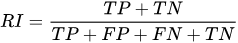


**F1-score**, is a better metric when there are imbalanced clusters because it's the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases.
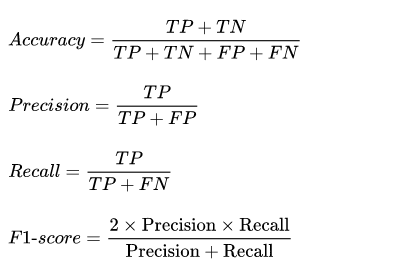


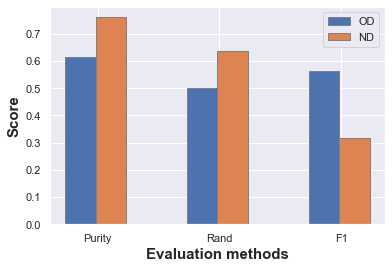

In [106]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

ODPurityScore = purity_score(OD["class"], clustersOD)
ODRandScore = metrics.rand_score(ND["class"], clustersOD)
ODF1Score = metrics.f1_score(OD["class"], clustersOD)

NDPurityScore = purity_score(ND["class"], clustersND)
NDRandScore = metrics.rand_score(ND["class"], clustersND)
NDF1Score = metrics.f1_score(ND["class"], clustersND)


#bar ploting clustering scores of OD/ND
barWidth = 0.25
data = [[ODPurityScore, ODRandScore, ODF1Score],
[NDPurityScore, NDRandScore, NDF1Score]]
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
plt.bar(br1, data[0], width = barWidth,
        edgecolor ='grey', label ='OD')
plt.bar(br2, data[1], width = barWidth,
        edgecolor ='grey', label ='ND')
plt.xlabel('Evaluation methods', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth - 0.11 for r in range(3)],
        ['Purity', 'Rand', 'F1'])
plt.legend()
plt.show()


## Scatter plot

To visualize the relations among features, I choosed age and polydipsia as axises.
The reasons of choosing age is, scatterplot looks bad with binary data. And the reason for choosing polydipsia is that at CND the feature which mostly correlates with clustering is polydipsia and this relation can visualized better.


In [1]:
plt.figure(figsize = (13,5))
plt.title("polydipsia-age")
plt.xlabel("age")
plt.ylabel("polydipsia")
plt.scatter(CND['age'], CND['polydipsia'],c=CND['clusters'],cmap='rainbow', alpha = 0.5)
plt.show()

NameError: name 'plt' is not defined

## Heatmap of correlations between features

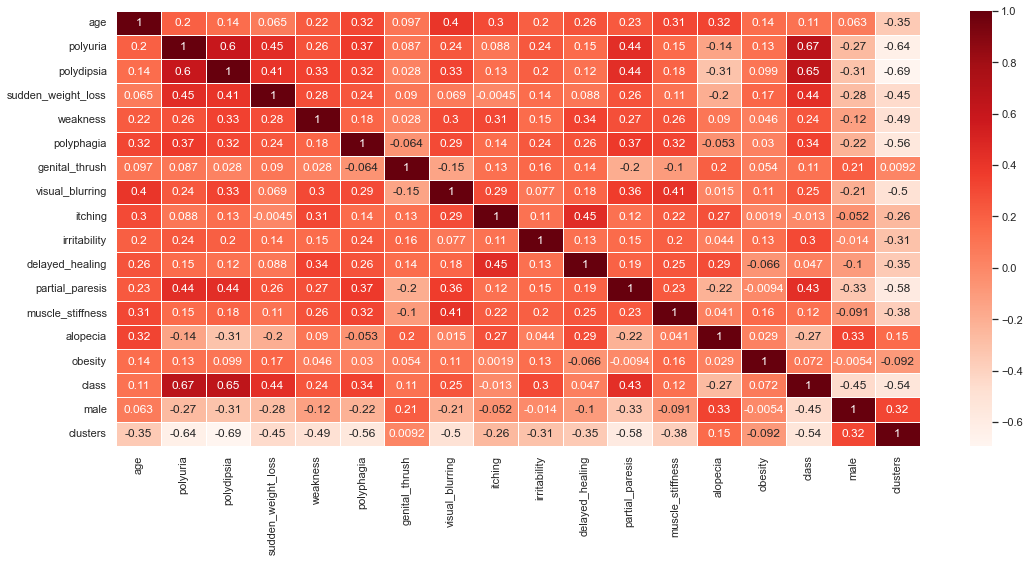

In [108]:
plt.figure(figsize = (18,8))
sns.heatmap(CND.corr(), annot=True, cmap=plt.cm.Reds, linewidths=.9)
plt.show()